<a href="https://colab.research.google.com/github/leodeveloper/RNN-LSTM-Implementation/blob/main/RNNs_%26_LSTM_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import tensorflow as tf
from tensorflow. keras.models import Sequential
from tensorflow. keras. layers import Dense, SimpleRNN, LSTM, Embedding
# Import the Tokenizer class from the text module in TensorFlow Keras preprocessing
# This class is used to vectorize a text corpus, by turning each text into either a
# (each integer being the index of a token in a dictionary) or into a vector where tl
# for each token could be binary, based on word count, based on tf-idf...
from tensorflow.keras.preprocessing.text import Tokenizer
# Import the pad_sequences function from the sequence module in TensorFlow Keras pre
# This function is used to ensure that all sequences in a list have the same length,
# by padding shorter sequences with a specified value (by default 0) or truncating l
# to a specified length.
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [23]:
sentences = [
    "Machine learning algorithms improve through experience."
    "Neural networks are inspired by biological neural networks."
    "Deep learning is a subset of machine learning."
    "Artificial intelligence aims to create intelligent machines."
    "Supervised learning uses labeled training data."
    "Unsupervised learning finds patterns in unlabeled data."
    "Reinforcement learning learns through interaction with an environment."
    "Natural language processing enables machines to understand human language."
    "Computer vision allows machines to interpret visual information."
    "Convolutional neural networks excel at image recognition tasks."
    "Recurrent neural networks are used for sequential data processing."
    "Support vector machines are effective for classification problems."
    "Decision trees are used for both classification and regression tasks."
    "Random forests combine multiple decision trees for improved accuracy."
    "Gradient boosting is an ensemble learning technique."
    "K-means clustering is an unsupervised learning algorithm."
    "Principal component analysis is used for dimensionality reduction."
    "Genetic algorithms are inspired by natural selection."
    "Artificial neural networks are composed of interconnected nodes."
    "Backpropagation is used to train neural networks."
    "Transfer learning leverages knowledge from pre-trained models."
    "Generative adversarial networks create new data samples."
    "Long short-term memory networks are used for time series analysis."
    "Autoencoders are used for feature learning and dimensionality reduction."
    "Ensemble methods combine multiple models for better predictions."
    "Overfitting occurs when a model performs well on training data but poorly on new data."
    "Cross-validation helps assess a model's performance on unseen data."
    "Hyperparameter tuning optimizes model performance."
    "Feature engineering creates new features from existing data."
    "Data preprocessing is crucial for successful machine learning."
    "Bias-variance tradeoff is a fundamental concept in machine learning."
    "Confusion matrices evaluate classification model performance."
    "ROC curves visualize classifier performance across different thresholds."
    "t-SNE is used for visualizing high-dimensional data."
    "Word embeddings represent words as vectors in a continuous space."
    "Sentiment analysis determines the emotional tone of text."
    "Recommender systems suggest items based on user preferences."
    "Anomaly detection identifies unusual patterns in data."
    "Reinforcement learning agents learn through trial and error."
    "Q-learning is a model-free reinforcement learning algorithm."
    "Markov decision processes model decision-making in uncertain environments."
    "Bayesian networks represent probabilistic relationships among variables."
    "Fuzzy logic allows for reasoning based on 'degrees of truth'."
    "Expert systems emulate human expert decision-making."
    "Knowledge representation is fundamental to artificial intelligence."
    "Heuristic search algorithms find approximate solutions to complex problems."
    "A* search algorithm is used for pathfinding and graph traversal."
    "Minimax algorithm is used in game theory and decision making."
    "Alpha-beta pruning optimizes the minimax algorithm."
    "Monte Carlo tree search is used in game AI."
    "Evolutionary algorithms solve optimization problems inspired by natural evolution."
    "Swarm intelligence algorithms are inspired by collective behavior in nature."
    "Self-organizing maps are used for dimensionality reduction and visualization."
    "Boltzmann machines are stochastic recurrent neural networks."
    "Restricted Boltzmann machines are used for dimensionality reduction and feature learning."
    "Deep belief networks are composed of multiple layers of latent variables."
    "Capsule networks aim to improve upon traditional convolutional neural networks."
    "Attention mechanisms allow models to focus on specific parts of input data."
    "Transformer models have revolutionized natural language processing tasks."
    "BERT is a transformer-based model for natural language understanding."
    "GPT (Generative Pre-trained Transformer) models generate human-like text."
    "Few-shot learning aims to learn from a small number of examples."
    "Zero-shot learning classifies instances of classes not seen during training."
    "Meta-learning involves learning how to learn efficiently."
    "Federated learning allows training models on distributed data sources."
    "Edge AI brings artificial intelligence capabilities to edge devices."
    "Explainable AI aims to make AI systems' decisions interpretable."
    "Adversarial machine learning studies vulnerabilities of AI systems."
    "Quantum machine learning explores quantum computing for AI tasks."
    "Neuromorphic computing aims to mimic biological neural systems."
    "Automated machine learning (AutoML) automates the process of applying machine learning."
    "Ethical AI focuses on developing AI systems that are fair and unbiased."
    "Computer-generated art uses AI to create original artworks."
    "AI-powered robotics combines AI with physical machines."
    "Conversational AI enables natural language interactions with machines."
    "Speech recognition converts spoken language into text."
    "Text-to-speech systems convert written text into spoken words."
    "Object detection identifies and locates objects in images or videos."
    "Semantic segmentation classifies each pixel in an image."
    "Instance segmentation identifies and delineates each object instance."
    "Facial recognition identifies or verifies a person from their face."
    "Emotion recognition detects human emotions from facial expressions or voice."
    "Gesture recognition interprets human gestures via mathematical algorithms."
    "Autonomous vehicles use AI for navigation and decision-making."
    "Predictive maintenance uses AI to predict equipment failures."
    "Fraud detection employs AI to identify fraudulent activities."
    "AI in healthcare assists in diagnosis and treatment planning."
    "Bioinformatics uses AI for analyzing biological data."
    "AI in finance is used for algorithmic trading and risk assessment."
    "Computational creativity explores AI's potential for creative tasks."
    "AI ethics addresses moral and societal implications of AI."
    "Artificial general intelligence aims to match human-level intelligence."
    "Narrow AI specializes in specific tasks."
    "The Turing test assesses a machine's ability to exhibit intelligent behavior."
    "Machine perception deals with how machines understand sensory input."
    "Cognitive computing aims to simulate human thought processes."
    "AI alignment ensures AI systems' goals are aligned with human values."
    "Robotic process automation uses AI to automate repetitive tasks."
    "AI augmentation enhances human intelligence rather than replacing it."
    "The singularity refers to the hypothetical future creation of superintelligent AI."
]

In [24]:
#Assign number or index to each word
tokenizer = Tokenizer()
# Fit the tokenizer on the provided sentences
tokenizer.fit_on_texts(sentences)
# Get the total number of unique words (plus one for padding)
total_words = len (tokenizer.word_index) + 1
print (total_words)
#unique words
print (tokenizer.word_index)
# Initialize a list to hold input sequences
input_sequences = []
# Iterate over each sentence

435
{'ai': 1, 'learning': 2, 'to': 3, 'for': 4, 'are': 5, 'is': 6, 'data': 7, 'in': 8, 'and': 9, 'networks': 10, 'of': 11, 'used': 12, 'a': 13, 'machine': 14, 'neural': 15, 'machines': 16, 'human': 17, 'on': 18, 'intelligence': 19, 'tasks': 20, 'decision': 21, 'algorithms': 22, 'aims': 23, 'natural': 24, 'language': 25, 'models': 26, 'model': 27, 'the': 28, 'systems': 29, 'artificial': 30, 'uses': 31, 'with': 32, 'recognition': 33, 'algorithm': 34, 'from': 35, 'text': 36, 'inspired': 37, 'by': 38, 'training': 39, 'an': 40, 'dimensionality': 41, 'reduction': 42, 'performance': 43, 'identifies': 44, 'making': 45, 'through': 46, 'biological': 47, 'create': 48, 'reinforcement': 49, 'processing': 50, 'allows': 51, 'classification': 52, 'problems': 53, 'multiple': 54, 'analysis': 55, 'new': 56, 'feature': 57, 'based': 58, 'detection': 59, 'learn': 60, 'search': 61, 'transformer': 62, 'computing': 63, 'or': 64, 'improve': 65, 'deep': 66, 'intelligent': 67, 'unsupervised': 68, 'patterns': 69, 

In [25]:
# Iterate over each sentence
for line in sentences:
  # Convert the sentence to a sequence of integers
  token_list = tokenizer.texts_to_sequences( [line]) [0]
  # print (token_list)
  # Create n-gram sequences (generate possiable combination of words in sentance)
  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[: i+1]
    input_sequences. append (n_gram_sequence)

In [26]:
# Determine the maximum sequence length
max_sequence_len = max([len(x) for x in input_sequences] )
# Pad sequences to ensure they are all the same length
input_sequences = np.array (pad_sequences (input_sequences, maxlen=max_sequence_len, padding='pre'))
#n-gram seq
print (input_sequences)
#[0 0 0 ... 0 14 2]
#[0 0 0 ... 0 I Want]
#[0 0 0 ... 14 2 22]
#[0 0 0 ... I Want to]

[[  0   0   0 ...   0  14   2]
 [  0   0   0 ...  14   2  22]
 [  0   0   0 ...   2  22  65]
 ...
 [  0   0  14 ... 432 433  11]
 [  0  14   2 ... 433  11 434]
 [ 14   2  22 ...  11 434   1]]


In [27]:
# all elements of seq except the last one
X = input_sequences [:, :-1]
print ("Input Data",X)
#the last element of each seq
y = input_sequences [:, -1]
#print ("Output Data",y)

Input Data [[  0   0   0 ...   0   0  14]
 [  0   0   0 ...   0  14   2]
 [  0   0   0 ...  14   2  22]
 ...
 [  0   0  14 ... 431 432 433]
 [  0  14   2 ... 432 433  11]
 [ 14   2  22 ... 433  11 434]]


In [28]:
#one hot encoding,predict word out of num clasess= unqiue words 435
y = tf.keras.utils.to_categorical(y, num_classes=total_words)

One Hot encoding
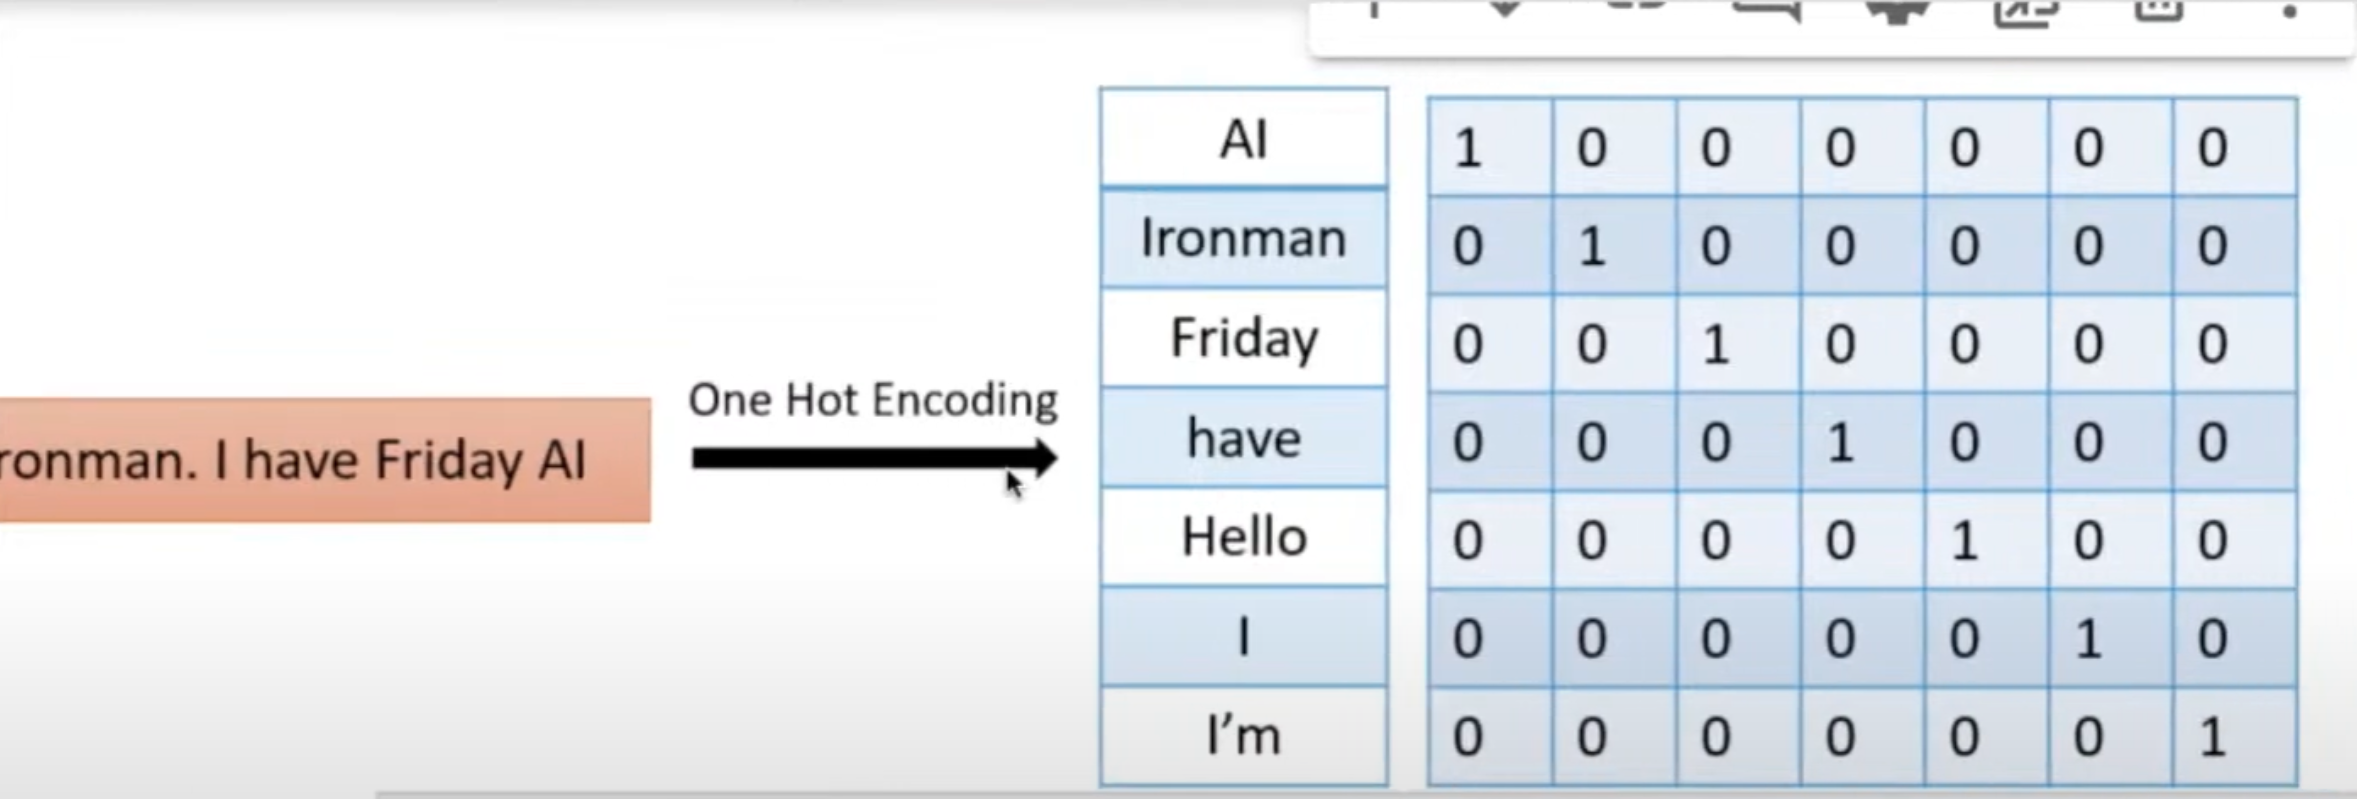

Padded input seq
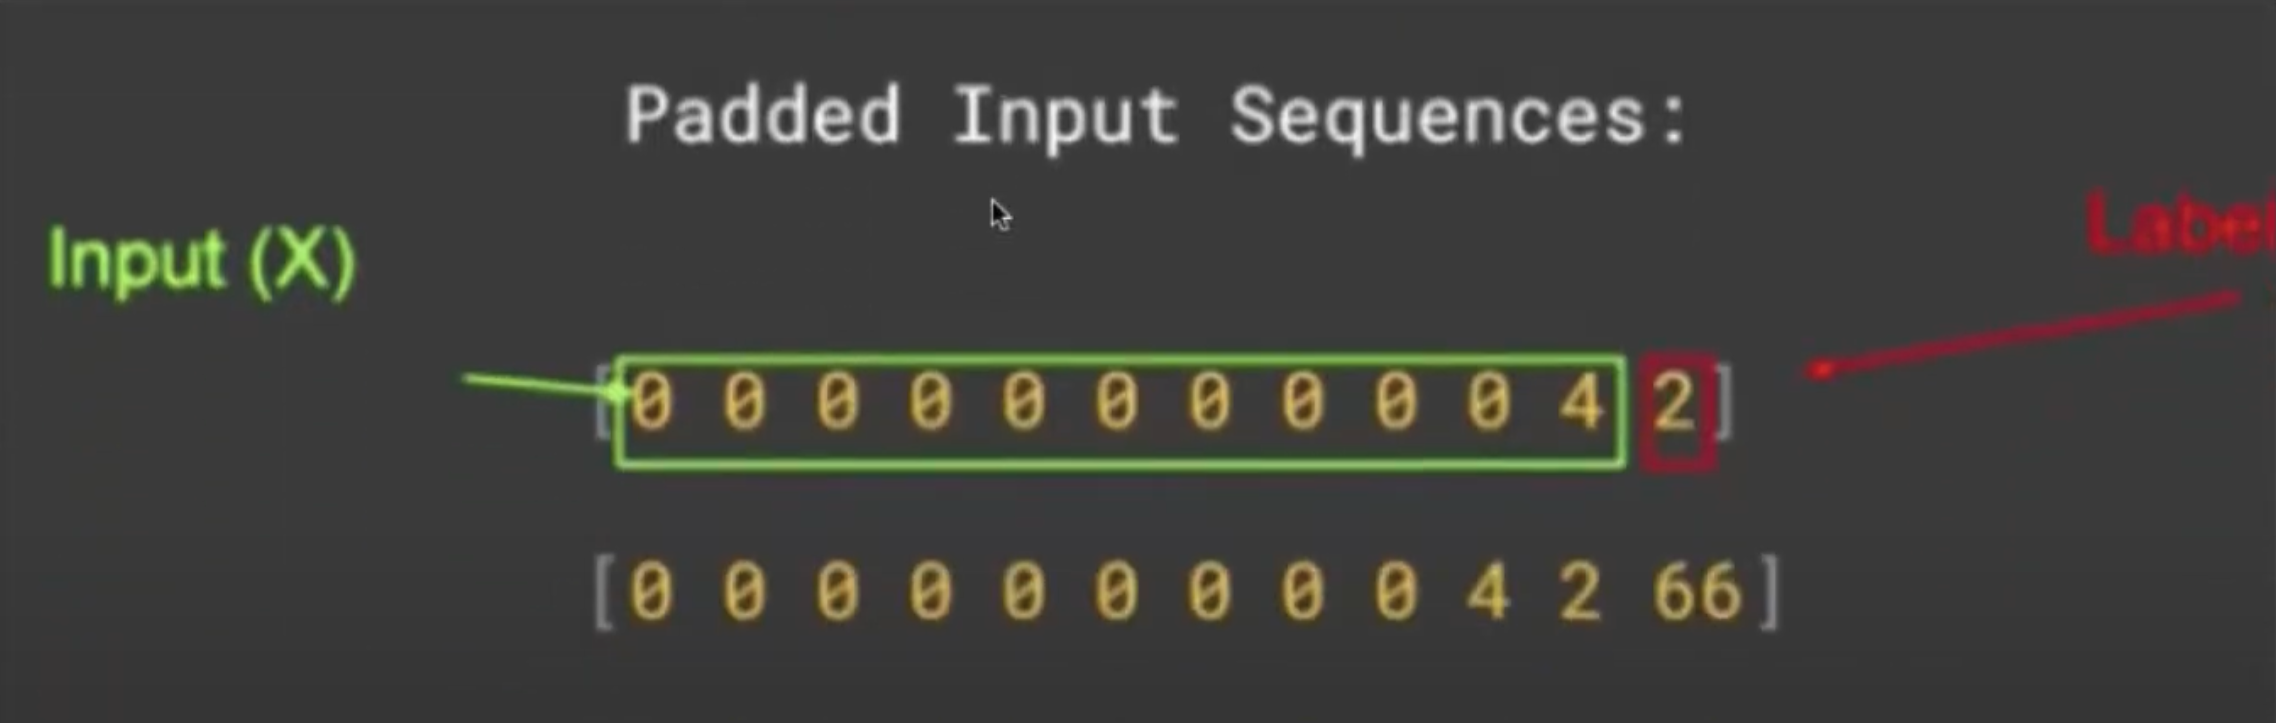


**Model Architecture**

Sequential Model: A linear stack of layers.

Embedding Layer: Converts word indices to dense vectors, helping the model u word relationships.

SimpleRNN Layer: Processes the sequence data and captures temporal depen

Dense Layer with Softmax: Outputs a probability distribution over the total wor the next word in the sequence.

```
# This is formatted as code
```



In [29]:
#Define the RNN model
#Sequential model allows stacking layers in a linear fashion
model = Sequential([
  # Embedding layer to convert word indices to dense vectors o
  # Input dimension: total number of words, Output dimension:
  # Input length: length of input sequences (excluding the las
  # 10 means, 10 diamention vector, feature save in the 10 diamention vector, if you have 1000 sentences the resultant vector size 1000*10
  #max_sequence_len, if I have sentance of 5 words than I will give 4 words as input, 5th will be pridict by model
  Embedding (total_words, 10, input_length=max_sequence_len-1),
  #RNN 30 seq of cells
  SimpleRNN(30),
  # Dense output layer with a softmax activation function
  # Output dimension: total number of words (for multi-class
  # softmax is the last layer
  Dense(total_words, activation='softmax')
  ])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [30]:
model.compile( loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [31]:
model.fit(X, y, epochs=50, verbose=1)

Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 125ms/step - accuracy: 0.0035 - loss: 6.0753
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.0040 - loss: 6.0369
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.0115 - loss: 5.9709
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.0265 - loss: 5.8577
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.0262 - loss: 5.7637
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.0372 - loss: 5.6533
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - accuracy: 0.0384 - loss: 5.5494
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.0214 - loss: 5.5781
Epoch 9/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.0324 - loss: 5.5644
Epoch 10/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.0335 - loss: 5.5390
Epoch 11/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.0330 - loss: 5.5356
Epoch 12/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy

In [32]:
# Function to predict the next word(s) given a seed text
def predict_next_word(seed_text, next_words=1):
  for _ in range(next_words):
    # Convert the seed text to a sequence of integers
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    # Pad the sequence to match the input length required
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    # Predict the probabilities of the next word in the se
    predicted = model.predict(token_list, verbose=0)
    # Get the index of the word with the highest probability
    predicted_word_index = np.argmax(predicted, axis=-1)[0]
    predicted_word = tokenizer.index_word[predicted_word_index]
    # Append the predicted word to the seed text
    seed_text += " " + predicted_word
    # Get the word corresponding to the predicted index
  return seed_text

0.90 is the predicted word


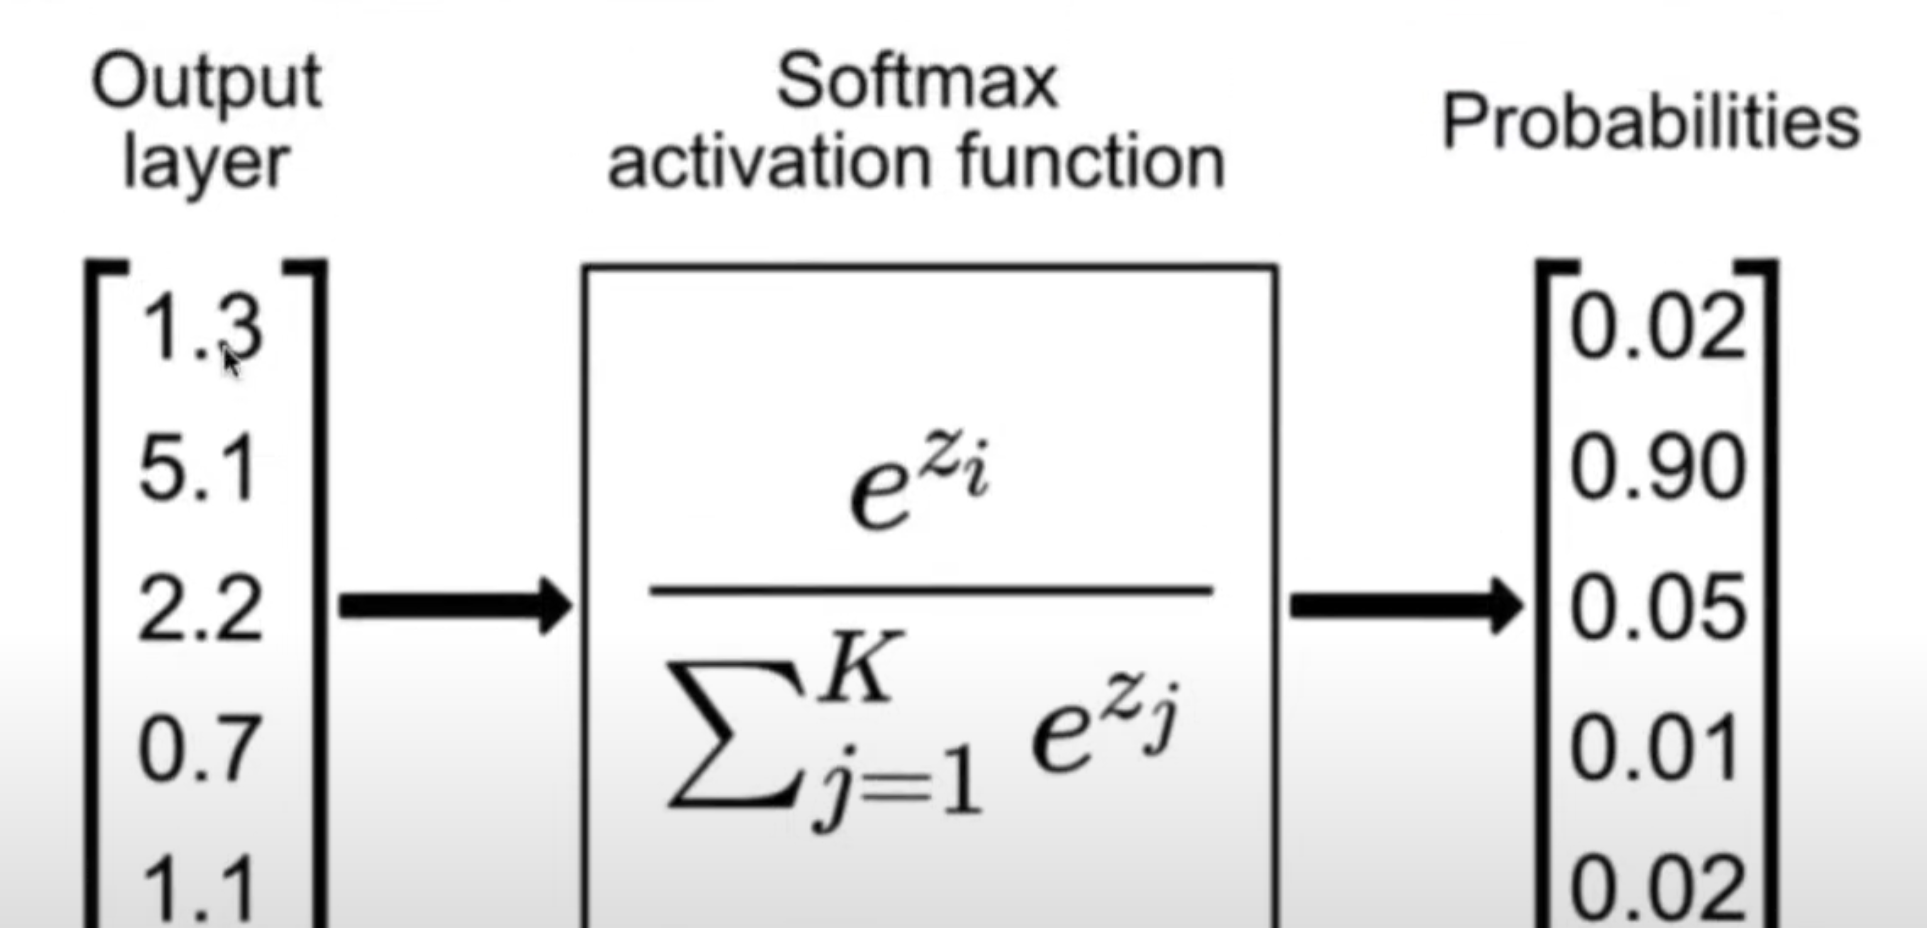

In [36]:
print(predict_next_word("machine learning ai to"))

machine learning ai to predict


**LSTM**

In [38]:
#Define the LSTM model
#Sequential model allows stacking layers in a linear fashion
model = Sequential([
  # Embedding layer to convert word indices to dense vectors o
  # Input dimension: total number of words, Output dimension:
  # Input length: length of input sequences (excluding the las
  # 10 means, 10 diamention vector, feature save in the 10 diamention vector, if you have 1000 sentences the resultant vector size 1000*10
  #max_sequence_len, if I have sentance of 5 words than I will give 4 words as input, 5th will be pridict by model
  Embedding (total_words, 10, input_length=max_sequence_len-1),
  #LSTM 100 seq of cells
  LSTM(100),
  # Dense output layer with a softmax activation function
  # Output dimension: total number of words (for multi-class
  # softmax is the last layer
  Dense(total_words, activation='softmax')
  ])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [39]:
model.compile( loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [40]:
model.fit(X, y, epochs=50, verbose=1)

Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.0126 - loss: 6.0716
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.0326 - loss: 5.7515
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.0294 - loss: 5.5591
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.0146 - loss: 5.6004
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.0238 - loss: 5.5538
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.0361 - loss: 5.4998
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.0198 - loss: 5.6073
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.0339 - loss: 5.5201
Epoch 9/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.0303 - loss: 5.5457
Epoch 10/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.0336 - loss: 5.5392
Epoch 11/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.0437 - loss: 5.5181
Epoch 12/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy:

In [56]:
# Function to predict the next word(s) given a seed text
# next_words mean predict 1 one word, if set next_words=2 it means predict two words
def predict_next_word(seed_text, next_words=2):
    for _ in range(next_words):
      # Convert the seed text to a sequence of integers
      token_list = tokenizer.texts_to_sequences([seed_text])[0]
      # Pad the sequence to match the input length required
      token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
      # Predict the probabilities of the next word in the se
      predicted = model.predict(token_list, verbose=0)
      # Get the index of the word with the highest probability
      predicted_word_index = np.argmax(predicted, axis=-1)[0]
      predicted_word = tokenizer.index_word[predicted_word_index]
      # Append the predicted word to the seed text
      seed_text += " " + predicted_word
      # Get the word corresponding to the predicted index
    return seed_text

In [57]:
print(predict_next_word("I",3))

I learning improve through
